In [1]:
import numpy
import os 
from PIL import Image 
import matplotlib.pyplot as plt

In [9]:
lookup = dict()
count = 0
for j in os.listdir('./data/00/'):
    lookup[j] = count
    count = count + 1
lookup

{'01_palm': 0,
 '02_l': 1,
 '03_fist': 2,
 '04_fist_moved': 3,
 '05_thumb': 4,
 '06_index': 5,
 '07_ok': 6,
 '08_palm_moved': 7,
 '09_c': 8,
 '10_down': 9}

In [13]:
data=[]
labels=[]

#Track of total images
datacount=0

#Loop over 10 folders
for i in range(0,10):
    #look in each folder for data
    for j in os.listdir('./data/0'+str(i)+'/'):
        count=0
        
        #Then look into each directory and extract image and label for each type
        for k in os.listdir('./data/0'+str(i)+'/'+j+'/'):
            #loop over each image of each type 
            #Convert to grayscale
            img=Image.open('./data/0'+str(i)+'/'+j+'/'+k).convert('L')
            
            img=img.resize((320,120))
            arr=numpy.array(img)
            data.append(arr)
            
            count+=1
            
        #fill the numpy vector with labels fetched from dictionary
        label_each=numpy.full((count,1),lookup[j])
        labels.append(label_each)
        
        #Count of total imageset 
        datacount+=count

data=numpy.array(data,dtype='float32')
labels=numpy.array(labels)
labels = labels.reshape(datacount, 1)

In [14]:
print("The total no. of images in dataset: ",datacount)

The total no. of images in dataset:  20000


In [15]:
#Creating reverse look up dictionary
reverse=dict()
for x in lookup:
    reverse[lookup[x]]=x
    
reverse

{0: '01_palm',
 1: '02_l',
 2: '03_fist',
 3: '04_fist_moved',
 4: '05_thumb',
 5: '06_index',
 6: '07_ok',
 7: '08_palm_moved',
 8: '09_c',
 9: '10_down'}

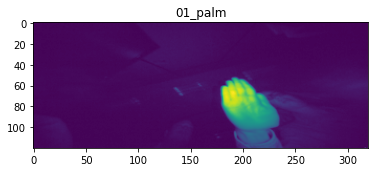

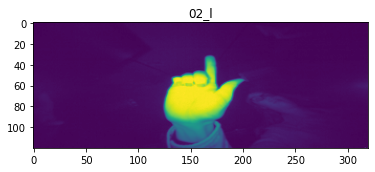

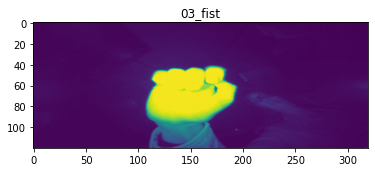

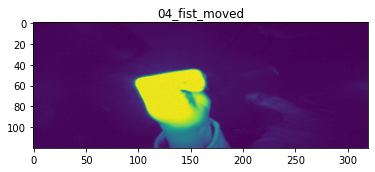

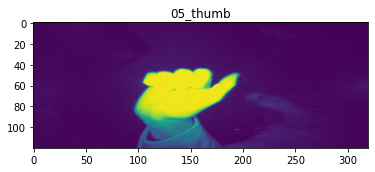

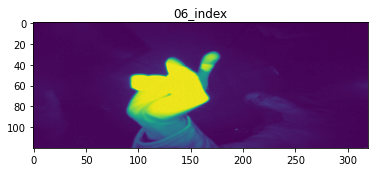

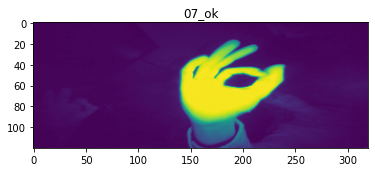

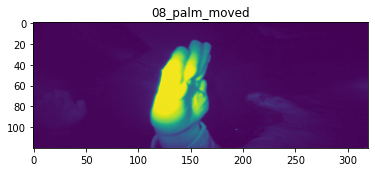

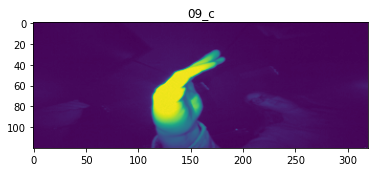

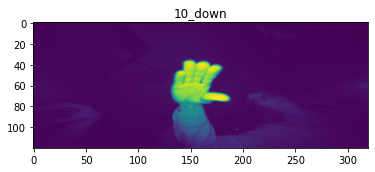

In [17]:
for i in range(0, 10):
    plt.imshow(data[i*200 , :, :])
    plt.title(reverselookup[labels[i*200 ,0]])
    plt.show()

In [18]:
from tensorflow import keras 
label = keras.utils.to_categorical(labels)

In [19]:
data = data.reshape((datacount, 120, 320, 1))
data /= 255

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_further,y_train,y_further = train_test_split(data,label,test_size = 0.2)
x_validate,x_test,y_validate,y_test = train_test_split(x_further,y_further,test_size = 0.5)

In [22]:
from tensorflow.keras import models,layers

In [23]:
model=models.Sequential()
model.add(layers.Conv2D(32, (5, 5), strides=(2, 2), activation='relu', input_shape=(120, 320,1))) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [24]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=64, verbose=1, validation_data=(x_validate, y_validate))

Epoch 1/10
250/250 [==============================] - 52s 208ms/step - loss: 0.2794 - accuracy: 0.9133 - val_loss: 0.0027 - val_accuracy: 0.9990
Epoch 2/10
250/250 [==============================] - 52s 206ms/step - loss: 0.0326 - accuracy: 0.9947 - val_loss: 0.0050 - val_accuracy: 0.9980
Epoch 3/10
250/250 [==============================] - 52s 206ms/step - loss: 0.0068 - accuracy: 0.9985 - val_loss: 0.0026 - val_accuracy: 0.9995
Epoch 4/10
250/250 [==============================] - 52s 206ms/step - loss: 0.0042 - accuracy: 0.9991 - val_loss: 0.0035 - val_accuracy: 0.9995
Epoch 5/10
250/250 [==============================] - 52s 207ms/step - loss: 0.0032 - accuracy: 0.9991 - val_loss: 0.0196 - val_accuracy: 0.9945
Epoch 6/10
250/250 [==============================] - 52s 206ms/step - loss: 0.0024 - accuracy: 0.9997 - val_loss: 0.0056 - val_accuracy: 0.9990
Epoch 7/10
250/250 [==============================] - 51s 205ms/step - loss: 0.0064 - accuracy: 0.9992 - val_loss: 0.0035 - val_ac

In [25]:
model.save('hand-model.h5')

In [26]:
[loss, acc] = model.evaluate(x_test,y_test,verbose=1)
print("Accuracy:" + str(acc))

63/63 [==============================] - 3s 40ms/step - loss: 9.0460e-04 - accuracy: 0.9995
Accuracy:0.9994999766349792
